# Homework: Running a DEM Landscape to Steady State and Comparing with a Synthetic Landscape

In this exercise, you will:
1. Load a DEM and run it to a steady state using a landscape evolution model.
2. Calculate and visualize the mean elevation and erosion rates for the DEM.
3. **Your Task:** Load the synthetic landscape and compare it with the DEM.

## Step 1: Import Libraries and Initialize Parameters

First, import the necessary libraries for the exercise:

In [1]:
#importing necessary components
import numpy as np
from landlab import RasterModelGrid, imshow_grid
from landlab.components import FlowAccumulator, FastscapeEroder, PriorityFloodFlowRouter
import matplotlib.pyplot as plt
import time
from bmi_topography import Topography

Step 2: Load DEM Data.

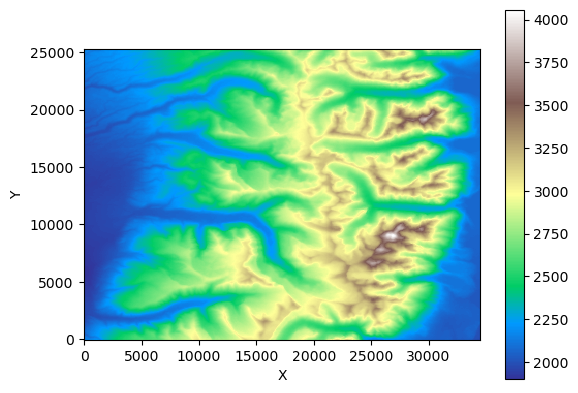

In [2]:
# Importing DEM using lat,long from OpenTopo website
the_grand_teton = Topography(
    north=43.891224,
    south=43.657248,
    east=-110.731375,
    west=-111.051308,
    output_format="GTiff",
    dem_type="SRTMGL3",
    api_key='0cd27050b72b986d65e2fcea7c9339ca'
)

the_grand_teton_DEM = the_grand_teton.load()
z = np.flipud(the_grand_teton_DEM.values.squeeze())

# Initialize RasterModelGrid
grid = RasterModelGrid(z.shape, xy_spacing=(90, 90))
grid.at_node["topographic__elevation"] = z.astype(float)

# Show the grid
imshow_grid(grid, "topographic__elevation", cmap="terrain")
plt.show()  # Ensure plt.show() is called to render the plot

Step 3: Set boundary conditions and time parameters for the loop to run the experiment. Notice that since we are "cutting" part of a fault, we are closing the North and South boundaries, letting the East and West ones open.

In [3]:
# Set boundary conditions
grid.set_closed_boundaries_at_grid_edges(right_is_closed=False, 
                                         top_is_closed=True, 
                                         left_is_closed=False, 
                                         bottom_is_closed=True)

# Instantiate components
fr = PriorityFloodFlowRouter(grid, flow_metric='D8')
fr.run_one_step()
sp = FastscapeEroder(grid, K_sp=1e-4)  # Adjust K_sp as needed

# Run model to equilibrium state
total_time = 100000  # (yr)
timestep = 100  # (yr)
ndt = int(total_time // timestep)  # calculation for loop

uplift = 0.001  # (m/yr)
uplift_per_step = uplift * timestep

mean_elevations = []
timesteps = []
erosion_rates = []

# Set initial timestamp (used to print progress updates)
start_time = time.time()

# Store the initial elevation for erosion rate calculation
previous_elevation = grid.at_node['topographic__elevation'].copy()

Step 4: Calculate and Compare Mean Elevation and Erosion Rates Calculate the mean elevation and erosion rates for both landscapes and compare them.

In [4]:
for i in range(ndt + 1):
    elapsed_time = i * timestep

    # Add uplift
    grid.at_node['topographic__elevation'][grid.core_nodes] += uplift_per_step

    # Run flow router and eroder
    fr.run_one_step()
    sp.run_one_step(dt=timestep)

    # Calculate erosion rate
    current_elevation = grid.at_node['topographic__elevation']
    elevation_change = previous_elevation - current_elevation
    erosion_rate = elevation_change[grid.core_nodes].sum() / (grid.number_of_nodes * timestep)
    erosion_rates.append(erosion_rate)
    
    # Update previous elevation
    previous_elevation = current_elevation.copy()

    # Print progress every 1000 years
    if i % 10 == 0:
        current_time = time.time()
        elapsed_real_time = current_time - start_time
        # print(f"Model time: {elapsed_time} years, Real time: {elapsed_real_time:.2f} seconds")

        # # Uncomment to print one figure every 1000 years
        # plt.figure(figsize=(10, 8))
        # imshow_grid(grid, 'topographic__elevation', cmap='terrain')
        # plt.title(f"Model Time: {elapsed_time} years")
        # plt.show()

        # Calculate and store mean elevation
        mean_elevation = grid.at_node['topographic__elevation'][grid.core_nodes].mean()
        mean_elevations.append(mean_elevation)
        timesteps.append(elapsed_time)


Step 5: Plotting the data

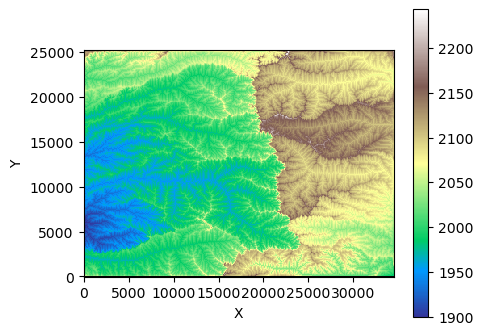

In [8]:
# Optional: Plot the final elevation
plt.figure(figsize=(5, 4))
imshow_grid(grid, 'topographic__elevation', cmap='terrain')
plt.show()

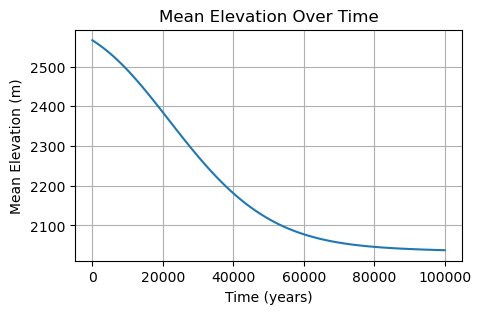

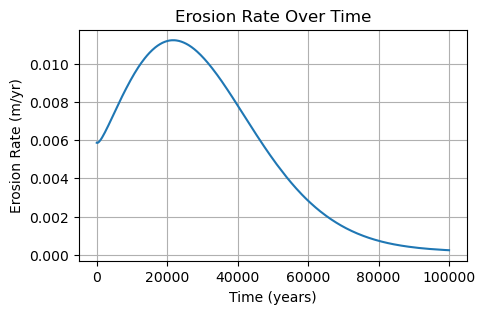

In [9]:
# Plot mean elevation vs. time
plt.figure(figsize=(5, 3))
plt.plot(timesteps, mean_elevations)
plt.xlabel('Time (years)')
plt.ylabel('Mean Elevation (m)')
plt.title('Mean Elevation Over Time')
plt.grid(True)
plt.show()


timestep2 = np.linspace(1, 100000, 1001) # Why do we 
# Plot erosion rate vs. time
plt.figure(figsize=(5, 3))
plt.plot(timestep2, erosion_rates)  # Note: erosion_rates may have fewer entries
plt.xlabel('Time (years)')
plt.ylabel('Erosion Rate (m/yr)')
plt.title('Erosion Rate Over Time')
plt.grid(True)
plt.show()

If you want to see what happens in the run, this is a gif with the elevations every 10kyrs:

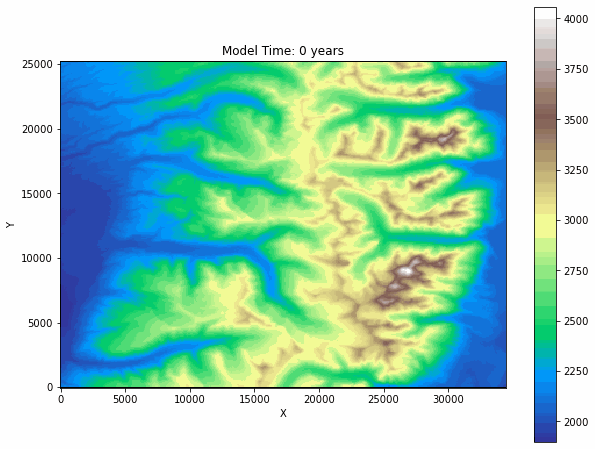

In [10]:
from IPython.display import Image

# Display the GIF
Image(filename='steady_state_movie.gif')

## Your Task: Load a Synthetic Landscape and Compare
Now, it's your turn to generate a synthetic landscape and compare it with the DEM! 

Follow these steps:

1. Load the synthetic landscape generated in the previous exercise.
2. Set up and run the landscape evolution model for the synthetic landscape.

### Calculate and Compare:

1. Calculate the mean elevation and erosion rates for the synthetic landscape.

In [6]:
# Write here your code
# Step 1: Load synthetic landscape produced in the first notebook

# Set parameters for the experiment

# Run experiment

# Plot the results

### Discussion Questions:

1. **Initial Conditions:**
   - How do the initial conditions (elevation, slope, and randomness) of the synthetic landscape compare to those of the DEM?
   - How might these initial differences influence the results after running the model to steady state?

2. **Mean Elevation:**
   - How does the mean elevation of the synthetic landscape compare to the DEM after reaching steady state?
   - What factors could explain any differences in mean elevation between the two landscapes?

3. **Erosion Rates:**
   - Compare the erosion rates between the synthetic landscape and the DEM. Are they similar or different?
   - How do the initial conditions and landscape characteristics affect the erosion rates observed?

4. **Landscape Features:**
   - Are there any noticeable differences in the spatial distribution of elevation between the synthetic landscape and the DEM?
   - What natural processes could be better represented in one model over the other?

5. **Model Sensitivity:**
   - How sensitive are the results to the parameters used in the landscape evolution model (e.g., erodibility factor \(K_{sp}\), initial slope)?
   - What changes in the model parameters could potentially lead to a closer match between the synthetic landscape and the DEM?

6. **Steady State:**
   - How do you define "steady state" in the context of landscape evolution modeling?
   - Do both landscapes appear to have reached a steady state? Why or why not?

7. **Model Limitations:**
   - What are the limitations of using a synthetic landscape for comparison with a real-world DEM?
   - How could the model be improved to provide more accurate comparisons?


These questions should help guide a thorough analysis and discussion of the comparison between the DEM and synthetic landscapes, encouraging deeper understanding and critical thinking about the modeling process and its implications.
